In [ ]:
import pandas as pd
import numpy as np

import torch

from torchvision import transforms
from PIL import Image

In [ ]:
# load the best model with PCA (trained by SFRS)
model = torch.hub.load('yxgeee/OpenIBL', 'vgg16_netvlad', pretrained=True).eval()
model

Using cache found in C:\Users\barte/.cache\torch\hub\yxgeee_OpenIBL_master
c:\Users\barte\anaconda3\envs\pikebot\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\barte\anaconda3\envs\pikebot\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/yxgeee/OpenIBL/releases/download/v0.1.0-beta/vgg16_netvlad.pth" to C:\Users\barte/.cache\torch\hub\checkpoints\vgg16_netvlad.pth
100%|██████████| 568M/568M [04:13<00:00, 2.35MB/s] 


EmbedNetPCA(
  (base_model): VGG(
    (base): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (

In [8]:
# read image
pil_img = Image.open('Eynsham\Images\grab_1216904045.433-0.ppm').convert('RGB') # modify the image path according to your need
transformer = transforms.Compose([transforms.Resize((480, 640)), # (height, width)
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.48501960784313836, 0.4579568627450961, 0.4076039215686255],
                                                       std=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098])])
img = transformer(pil_img)

# use GPU (optional)
model = model.cuda()
img = img.cuda()

In [9]:
# extract descriptor (4096-dim)
with torch.no_grad():
    des = model(img.unsqueeze(0))[0]
des = des.cpu().numpy()
des.shape

(4096,)

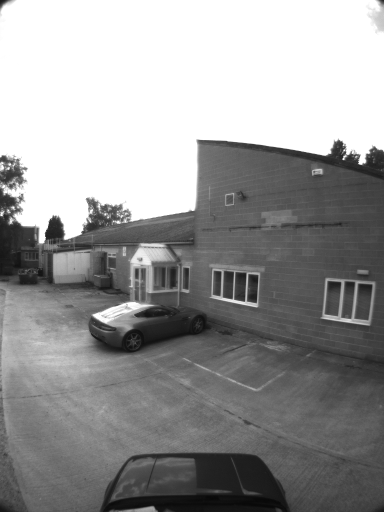

In [11]:
pil_img